In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and inspect data

In [6]:
data = pd.read_csv("conversion_data.csv")
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [61]:
# Looking for nulls
print(data.isnull().any())

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool


In [4]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
for column in data.columns:
    uniques = sorted(data[column].unique())
    print('{0:20s} {1:5d}\t'.format(column, len(uniques)), uniques[:6])

country                  4	 ['China', 'Germany', 'UK', 'US']
age                     60	 [17, 18, 19, 20, 21, 22]
new_user                 2	 [0, 1]
source                   3	 ['Ads', 'Direct', 'Seo']
total_pages_visited     29	 [1, 2, 3, 4, 5, 6]
converted                2	 [0, 1]


### Handle Age Outliers

From the descriptive statistical table, we can see that the maximum age in the dataset is 123, which is quite abnormal. So we need to handle those ourliers.

In [6]:
data[data['age'] > 100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


We can remove those two outliers and see the age range of the remaining data.

In [7]:
data = data[data['age'] < 100]
data['age'].describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

Now the minimun age is 17 and the maximum age is 79, which makes sense.

### Inspect country distribution and its relationship with conversion

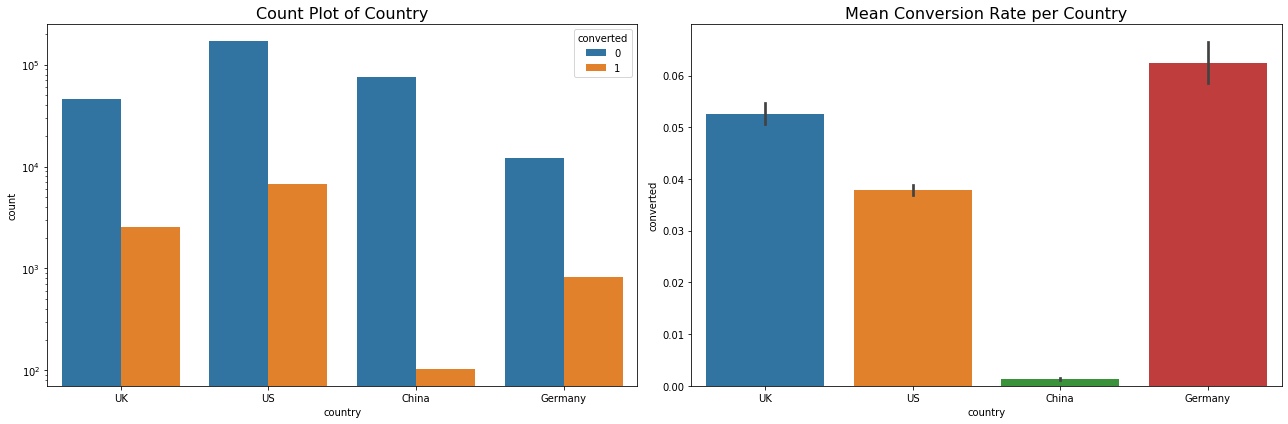

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Country', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='country', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Country', fontsize=16)
plt.tight_layout()
plt.show()

From above plots, we can see two problems:
1. There are lot of users from China, but the conversion rate is lowest
2. Conversion rate in German is very high, but there aren't a lot of users from German

### Inspect distribution of different source types and its relationship with conversion

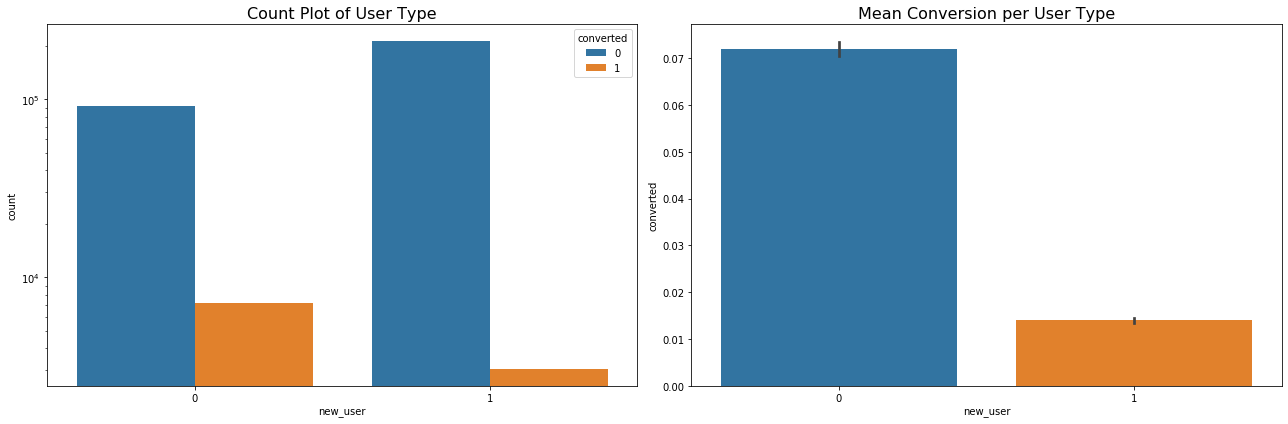

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of User Type', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='new_user', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion per User Type', fontsize=16)
plt.tight_layout()
plt.show()

From above plots, we can know that there are more new users, but their conversion rate is lower than older ones.

### Inspect distribution of different source types and its relationship with conversion

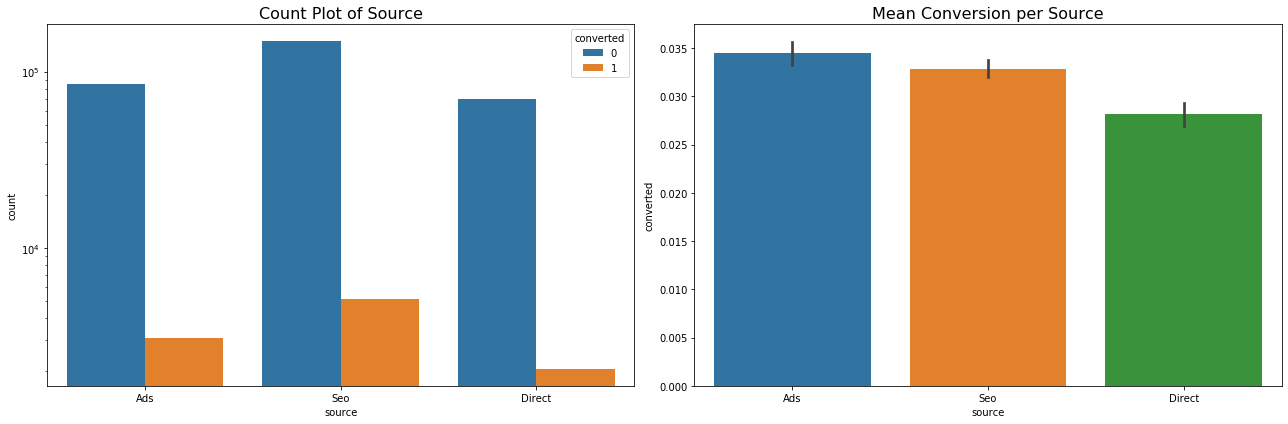

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_title('Count Plot of Source', fontsize=16)
ax[0].set_yscale('log')

sns.barplot(x='source', y='converted', data=data, ax=ax[1])
ax[1].set_title('Mean Conversion per Source', fontsize=16)
plt.tight_layout()
plt.show()

From above plots, we can know that most people came from Seo but people from Ads have the highest mean conversion rate.

### Inspect age distribution

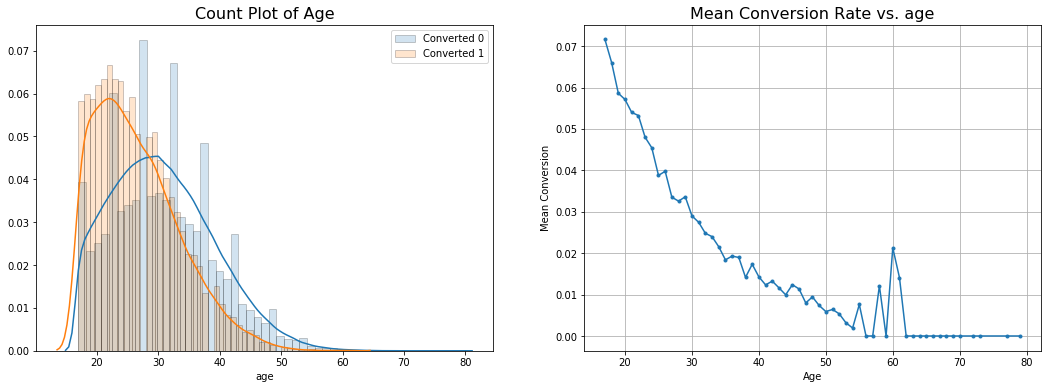

In [49]:
hist_kws = {'edgecolor': 'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['age'],
             label='Converted 0',
             ax=ax[0],
             hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['age'],
             label='Converted 1',
             ax=ax[0],
             hist_kws=hist_kws)
ax[0].set_title('Count Plot of Age', fontsize=16)
ax[0].legend()

age_grouped = data.groupby('age')['converted'].mean().reset_index(
    name='mean_converted')
ax[1].plot(age_grouped['age'], age_grouped['mean_converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. age', fontsize=16)
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Mean Conversion')
ax[1].grid(True)
plt.show()

From the above plots, we can find that people's conversion rate decreases with the increase of their age in general. But for some people in their mid 50s to 60s, their conversion rate is higher than average.

### Inspect total page visited distribution

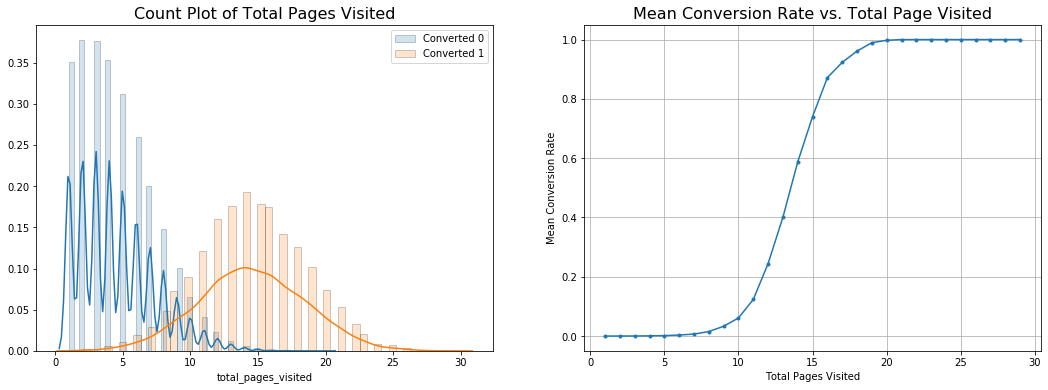

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.distplot(data[data['converted'] == 0]['total_pages_visited'],
             label='Converted 0',
             ax=ax[0],
             hist_kws=hist_kws)
sns.distplot(data[data['converted'] == 1]['total_pages_visited'],
             label='Converted 1',
             ax=ax[0],
             hist_kws=hist_kws)
ax[0].set_title('Count Plot of Total Pages Visited', fontsize=16)
ax[0].legend()

visited_grouped = data.groupby('total_pages_visited')['converted'].mean(
).reset_index(name='mean_converted')
ax[1].plot(visited_grouped['total_pages_visited'],
           visited_grouped['mean_converted'], '.-')
ax[1].set_title('Mean Conversion Rate vs. Total Page Visited', fontsize=16)
ax[1].set_xlabel('Total Pages Visited')
ax[1].set_ylabel('Mean Conversion Rate')
ax[1].grid(True)
plt.show()

From the above plots, we can find that people's conversion rate increases with the increase of their total page visited. For people who visited less than 10 pages, their average conversion rate is close to 0 while for people who visited more than 20 pages, their average conversion rate is almost 1.

## Build Machine Learning Classification Model

### Build a RandomForest Classification Model

In [11]:
# make sure the target variable is categorical
from sklearn.preprocessing import LabelEncoder

data['new_user'] = data['new_user'].astype('category')
data['converted'] = data['converted'].astype('category')

data['country'] = LabelEncoder().fit_transform(data['country'])
data['source'] = LabelEncoder().fit_transform(data['source'])

In [12]:
# Split the dataset into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['converted'],
                                                              axis=1),
                                                    data['converted'],
                                                    random_state=42)

In [13]:
# Build random forest model, find the best model using GridSearchCV

#from sklearn.model_selection import GridSearchCV#
#from sklearn.ensemble import RandomForestClassifier

#grid_forest = {"n_estimators": np.arange(1, 100, 5)}
#forest = RandomForestClassifier()
#forest_cv = GridSearchCV(forest, grid_forest, cv = 10)
#forest_cv.fit(X_train, y_train)

#print("best parameters: ", forest_cv.best_params_)
#print("accuracy: ", forest_cv.best_score_)

In [14]:
# Fit the random forest model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Show feature importance
source: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

In [15]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(model, X_train, y_train):
    return r2_score(y_train, model.predict(X_train))

perm_imp_rfpimp = permutation_importances(model, X_train, y_train, r2)
perm_imp_rfpimp

,Importance
Feature,
total_pages_visited,1.192575
age,0.207696
country,0.147397
new_user,0.147397
source,0.073698


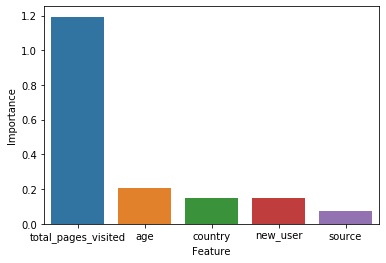

In [16]:
sns.barplot(x=perm_imp_rfpimp.index, y=perm_imp_rfpimp['Importance'], data=perm_imp_rfpimp)
plt.show()

### Get the performace report of the model

In [84]:
# Score on train set and test set
print("Train score: {:5f}".format(model.score(X_train, y_train)))
print("Test score: {:5f}".aformat(model.score(X_test, y_test)))

Train score: 0.988256
Test score: 0.985123


In [85]:
# Get classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     76553
           1       0.81      0.69      0.75      2497

    accuracy                           0.99     79050
   macro avg       0.90      0.84      0.87     79050
weighted avg       0.98      0.99      0.98     79050



From above, we know our model has a high precision 0.81, which means that if the model predict a user to be converted, it is correct 81% of a time, but a not very good recall 0.69, which means that it misclassifies 31% converted users as non-converted.
Because that incorrectly classifing a converted user as non-converted will pay much, we need to increase  the the recall with the price lower than precision.

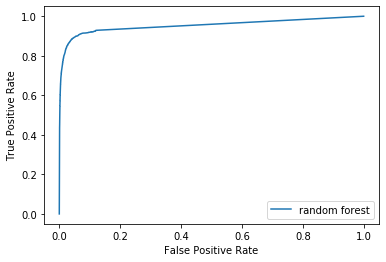

In [110]:
# ROC Curve
from sklearn.metrics import auc, roc_curve

y_pred_prob = model.predict_proba(X_test)
y_pred_prob = y_pred_prob[:, 1]
test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(test_fpr, test_tpr, label='random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [111]:
# Calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: %.3f' % auc)

AUC: 0.953


AUC is 0.953, it means there is 95% chance that model will be able to distinguish between converted users and non-converted users.

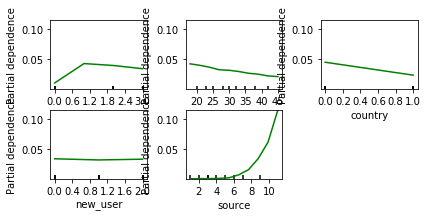

In [135]:
from sklearn.inspection import plot_partial_dependence
features = ['total_pages_visited', 'age', 'country', 'new_user', 'source']
my_plots = plot_partial_dependence(model,
                                   features=[0, 1, 2, 3, 4],
                                   X=X_train,
                                   feature_names=[
                                       'total_pages_visited', 'age', 'country',
                                       'new_user', 'source'
                                   ],
                                   grid_resolution=10)